<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/Lista_2/Lista2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook foi criado para a resolução lista 2 da disciplina: DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS

**Aluno: Paulo Ricardo Dantas**

# Questões


## Questão 1
Considere o problema de classificação de padrões bidimensionais constituído neste caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando uma classe e as outras quatro classes nas regiões de não interseção. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. Treine uma rede neural Deep MLP

- Verifique o desempenho do classificador usando o conjunto de validação e calculando a
matriz de confusão.
- Compare o desempenho com a solução obtida na lista com a técnica Random Forrest.

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Funções base para o problema


In [2]:
# Função para verificar se um ponto está dentro do semicírculo
def in_semicircle(x, y, cx, cy):
    if cx != 0:
        return (x - cx)**2 + (y - cy)**2 <= 1
    else:
        return (x - cx)**2 + (y - cy)**2 <= 1

def draw_semicircle(ax, center, radius, orientation, color):
    theta = np.linspace(0, np.pi, 100)
    if orientation == 'left':
        x = center[0] + radius * (np.sin(theta))
        y = center[1] + radius * (np.cos(theta))
    elif orientation == 'up':
        x = center[0] - radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
    elif orientation == 'right':
        x = center[0] + radius * (-np.sin(theta))
        y = center[1] - radius * (np.cos(theta))
    elif orientation == 'down':
        x = center[0] + radius * np.cos(theta)
        y = center[1] - radius * np.sin(theta)
    ax.fill(x, y, color=color, alpha=0.3)

### Definindo a quantidade de pontos e gerando-os aleatoriamente

In [3]:
# Definir o número de pontos para cada classe
n_points = 8000
# Gerar pontos aleatórios no quadrado
points = np.random.uniform(-1, 1, (n_points * 5, 2))
labels = np.zeros((n_points * 5,))

### Atribuindo rótulos

In [4]:
# Atribuir rótulos às classes
for i, (x, y) in enumerate(points):
    if in_semicircle(x, y, 1, 0) and in_semicircle(x, y, -1, 0) and in_semicircle(x, y, 0, 1) and in_semicircle(x, y, 0, -1):
        labels[i] = 0
    elif in_semicircle(x, y, 1, 0) and in_semicircle(x, y, 0, 1):
        labels[i] = 1
    elif in_semicircle(x, y, 1, 0) and in_semicircle(x, y, 0, -1):
        labels[i] = 2
    elif in_semicircle(x, y, 0, 1) and in_semicircle(x, y, -1, 0):
        labels[i] = 3
    elif in_semicircle(x, y, 0, -1) and in_semicircle(x, y, -1, 0):
        labels[i] = 4

### Desenhando os semicírculos e plotando os pontos


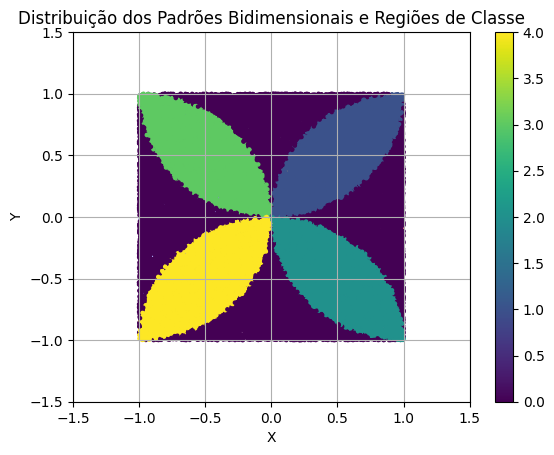

In [5]:
# Desenhar os semicírculos
ax = plt.gca()
draw_semicircle(ax, (1, 0), 1, 'right', 'red')
draw_semicircle(ax, (-1, 0), 1, 'left', 'blue')
draw_semicircle(ax, (0, 1), 1, 'down', 'green')
draw_semicircle(ax, (0, -1), 1, 'up', 'purple')
# Plotar os pontos
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribuição dos Padrões Bidimensionais e Regiões de Classe')
plt.grid(True)
plt.show()

### Treinamento do modelo

In [7]:
# Cross-validation
X_train, X_val, y_train, y_val = train_test_split(points, labels, test_size=0.2, random_state=42, stratify=labels)

# Definiindo a arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

# Compilando
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Avaliaando o desempenho
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.4190 - accuracy: 0.8307 - val_loss: 0.1835 - val_accuracy: 0.9326
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1490 - accuracy: 0.9447 - val_loss: 0.1309 - val_accuracy: 0.9474
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1183 - accuracy: 0.9540 - val_loss: 0.1046 - val_accuracy: 0.9599
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1003 - accuracy: 0.9608 - val_loss: 0.0792 - val_accuracy: 0.9724
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0875 - accuracy: 0.9655 - val_loss: 0.0829 - val_accuracy: 0.9649
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0826 - accuracy: 0.9674 - val_loss: 0.0937 - val_accuracy: 0.9603
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0816 - accuracy: 0.9661 - val_loss: 0.1039 - val_ac

### Usando o modelo

250/250 [==============================] - 1s 1ms/step


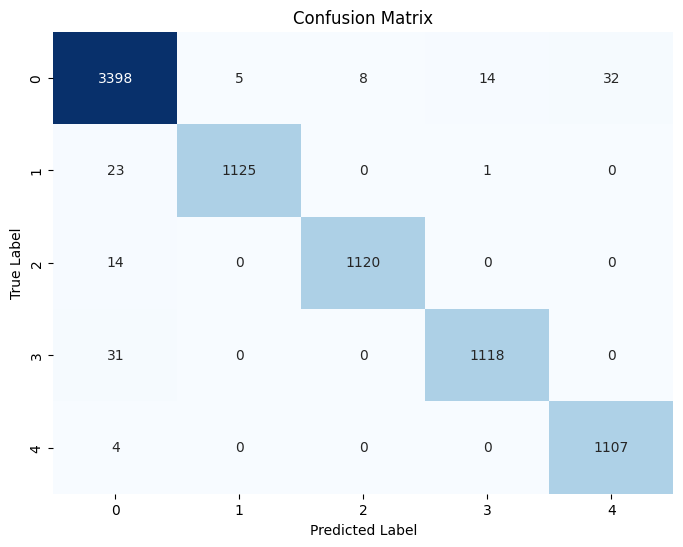

In [8]:
# Fazer previsões no conjunto de teste
y_pred = np.argmax(model.predict(X_val), axis=1)

# Calcular a matriz de confusão
conf_mat = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

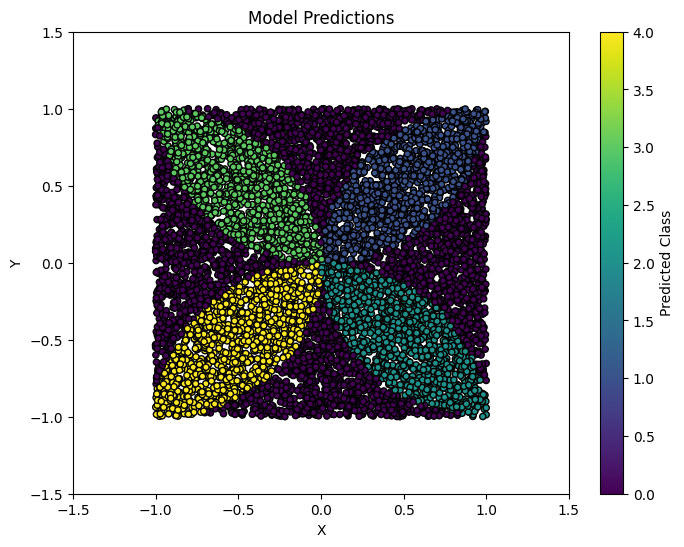

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_pred, cmap='viridis', s=20, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Predictions')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.colorbar(label='Predicted Class')
plt.show()

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Importar o Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento do Modelo
modelo.fit(X_train, y_train)

# Previsões no Conjunto de Teste
y_pred = modelo.predict(X_val)

# Avaliação do Modelo
acuracia = accuracy_score(y_val, y_pred)
print("Accuracy:", acuracia)

Accuracy: 0.98725


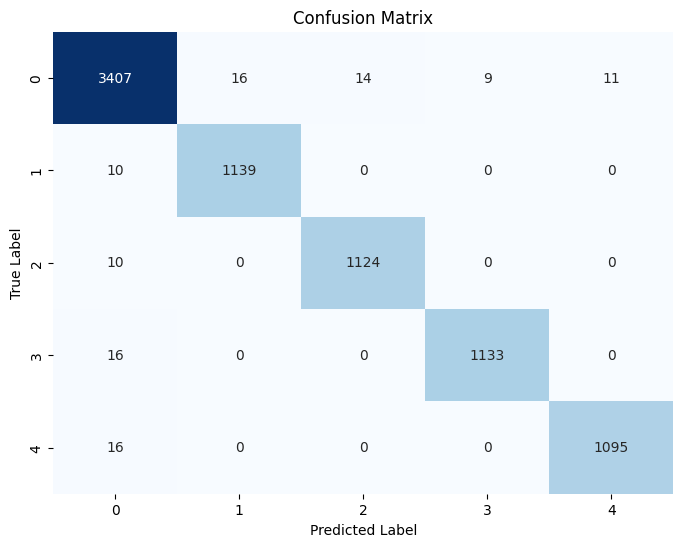

In [11]:
conf_mat = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

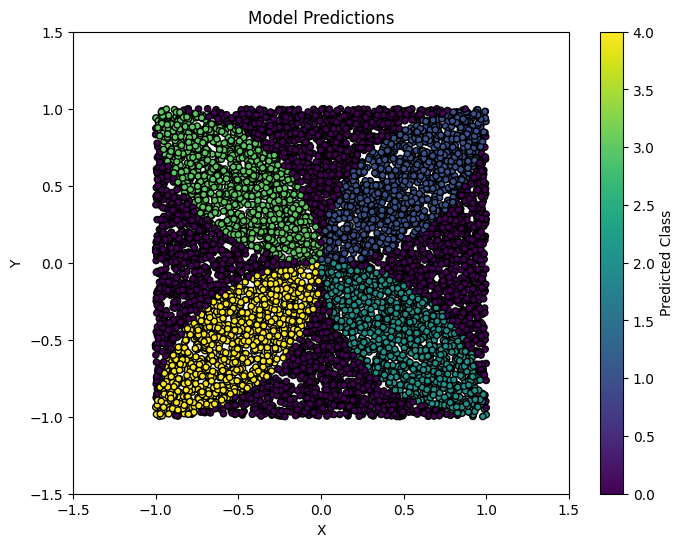

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_pred, cmap='viridis', s=20, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Predictions')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.colorbar(label='Predicted Class')
plt.show()

### Conclusão

Para esse caso em específico, como o random forest é menos sensível a variabilidade dos dados, o mesmo apresentou melhor acurácia do que o MLP. Dependendo da questão, ambos são opções viáveis para se usar, porém é necessário ressaltar o custo computacional do MLP.

## Questão 2

Utilize uma rede neural perceptron de múltiplas camadas para aproximar a função abaixo.

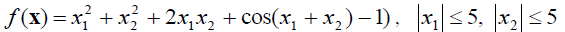

Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela rede neural. Apresente também a curva da função custo no treinamento e a curva do erro médio quadrado com relação ao o conjunto de validação. Procure definir a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada camada e o número de neurônios camada de saída.


Observações. Como se trata de um problema de aproximação de funções, considere a camada de saída do tipo linear puro.

In [13]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Gerando dados e aplainando os dados (flattening)

In [17]:
# Gerando dados
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = X1**2 + X2**2 + 2*X1*X2 + np.cos(X1 + X2) - 1

# Aplainando os dados
X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y.ravel()

### Treinamento do modelo

In [19]:
# Cross-validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

# Compilando o modelo
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
)

# Treinar o modelo e guardar a função custo de validação em cada iteração
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 199.1057 - val_loss: 21.7152
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 10.1145 - val_loss: 3.5413
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 1.7516 - val_loss: 0.7833
Epoch 4/100
250/250 [==============================] - 3s 10ms/step - loss: 0.6401 - val_loss: 0.3116
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3285 - val_loss: 0.3888
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2560 - val_loss: 0.1993
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2056 - val_loss: 0.2109
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1590 - val_loss: 0.0896
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1547 - val_loss: 0.1095
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1156 - v

In [20]:
# Predições
y_pred = model.predict(X)

313/313 [==============================] - 1s 1ms/step


### Gráficos

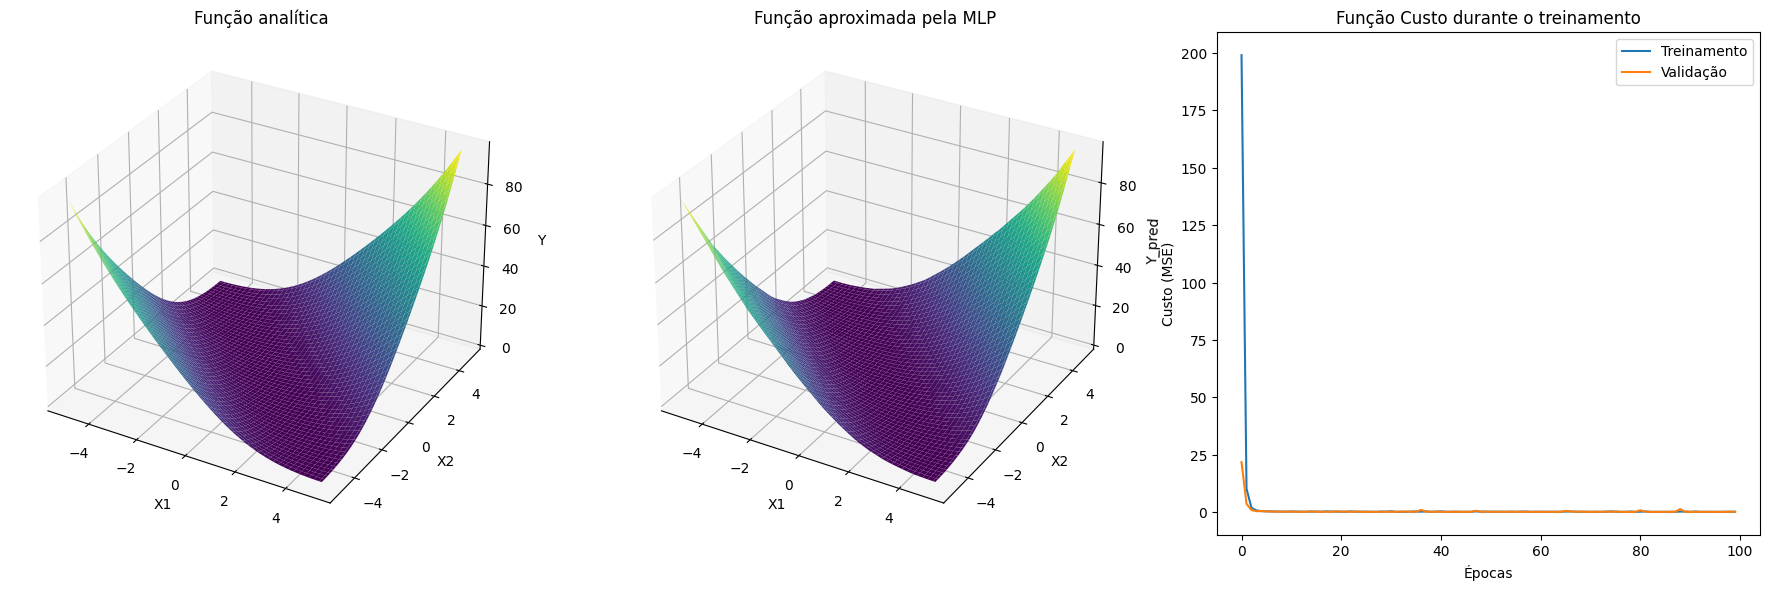

In [23]:
# Plotar a função analítica e a função aproximada
fig = plt.figure(figsize=(18, 6))

# Gráfico da função analítica
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_title('Função analítica')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Gráfico da função aproximada
Y_pred = y_pred.reshape(X1.shape)
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax.set_title('Função aproximada pela MLP')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_pred')

# Plotar a curva de custo durante o treinamento
ax = fig.add_subplot(1, 3, 3)
ax.plot(history.history['loss'], label='Treinamento')
ax.plot(history.history['val_loss'], label='Validação')
ax.legend()
ax.set_title('Função Custo durante o treinamento')
ax.set_xlabel('Épocas')
ax.set_ylabel('Custo (MSE)')

plt.tight_layout()
plt.show()

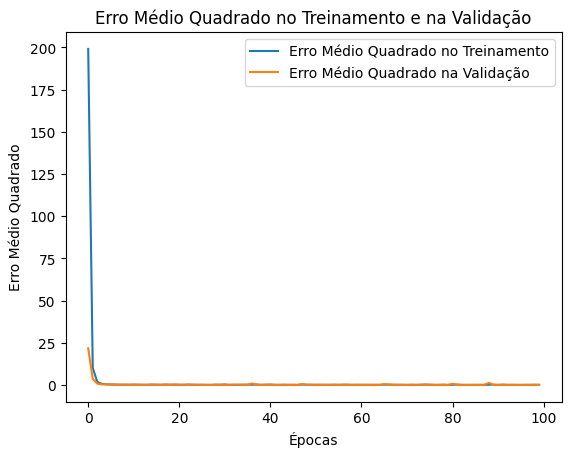

Erro Quadrático Médio (MSE) no conjunto de validação: 0.0214


In [26]:
# Plotar a curva de erro médio quadrado no treinamento e na validação
plt.figure()
plt.plot(history.history['loss'], label='Erro Médio Quadrado no Treinamento')
plt.plot(history.history['val_loss'], label='Erro Médio Quadrado na Validação')
plt.legend()
plt.title('Erro Médio Quadrado no Treinamento e na Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Quadrado')
plt.show()

# MSE na validação
val_mse = model.evaluate(X_val, y_val, verbose=0)
print(f'Erro Quadrático Médio (MSE) no conjunto de validação: {val_mse:.4f}')

### Conclusões

O modelo se saiu ótimo no objetivo de aproximar o valor da função, em poucas épocas (iterações) o erro saltou de muito alto para próximo de zero.

## Questão 3

Considere uma rede deep learning convolutiva (treinada) - CNN aplicada à classificação
de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A
referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil
para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião,
navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem
possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído
por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação
em uma matriz de confusão.
Obs. Pesquise e utilize uma rede convolutiva já treinada

In [46]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Importando dataset

In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizando os dados de teste
x_test = x_test.astype('float32') / 255.0

# Verifique as formas dos dados
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Importando a CNN
Usando o modelo já treinado, disponível no seguinte github: https://github.com/rohanchopra/cifar10

In [ ]:
file_url = 'https://github.com/rohanchopra/cifar10/raw/master/augmented_best_model.h5'
!wget -O model.h5 $file_url

In [54]:
model_path = '/content/model.h5'  # Caminho para o arquivo baixado
model = load_model(model_path)

### Usando o modelo


In [55]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Verifique as previsões e rótulos verdadeiros
print(f'y_pred_classes shape: {y_pred_classes.shape}')
print(f'y_true shape: {y_true.shape}')

313/313 [==============================] - 110s 352ms/step
y_pred_classes shape: (10000,)
y_true shape: (10000,)


In [56]:
print("Primeiras previsões e rótulos verdadeiros:")
print(f'y_pred_classes[:10]: {y_pred_classes[:10]}')
print(f'y_true[:10]: {y_true[:10]}')

Primeiras previsões e rótulos verdadeiros:
y_pred_classes[:10]: [3 8 8 0 6 6 1 6 3 1]
y_true[:10]: [3 8 8 0 6 6 1 6 3 1]


### Analisando resultados

<Figure size 1000x800 with 0 Axes>

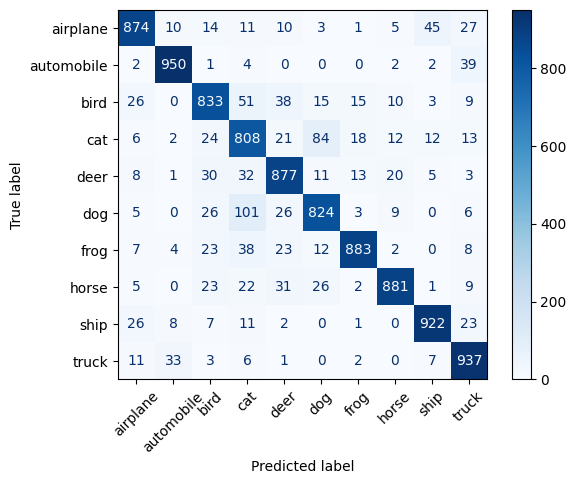

In [57]:
cm = confusion_matrix(y_true, y_pred_classes)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Configurando o gráfico
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

# Trabalhos
